<a href="https://colab.research.google.com/github/psiudo/NumericalMethods/blob/main/EigenValues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import sympy as sp


# Define the neuron network matrix
def three_neuron (t, y):
  A = [[-5, -10, 7], [7, -5 , -10], [-10, 7, -5]]

np.linalg.eig(A)[0]

array([-3.5+14.72243186j, -3.5-14.72243186j, -8.  +0.j        ])

In [ ]:
np.roots([1, 0, -210, -1343])

array([17. +0.j        , -8.5+2.59807621j, -8.5-2.59807621j])

In [ ]:
np.roots([1,3,-3,-1])

array([-3.73205081,  1.        , -0.26794919])

In [31]:
# Define the symbols
lambda_ = sp.Symbol('lambda'); g = sp.Symbol('g')
matrix = sp.Matrix([[lambda_+5, g, -7], [-7, lambda_ + 5, g], [g, -7, lambda_ + 5]])

solutions_lambda = sp.solve(sp.det(matrix), lambda_)

sp.pprint(solutions_lambda)
print(solutions_lambda)

⎡       g   √3⋅ⅈ⋅g   17   7⋅√3⋅ⅈ  g   √3⋅ⅈ⋅g   17   7⋅√3⋅ⅈ⎤
⎢2 - g, ─ - ────── - ── - ──────, ─ + ────── - ── + ──────⎥
⎣       2     2      2      2     2     2      2      2   ⎦
[2 - g, g/2 - sqrt(3)*I*g/2 - 17/2 - 7*sqrt(3)*I/2, g/2 + sqrt(3)*I*g/2 - 17/2 + 7*sqrt(3)*I/2]


In [54]:
# 행렬 곱 (차워변환은 알아서 됨)
A = np.array([[1, 2], [3, 4]])  # 2x2 행렬
B = np.array([5, 6])  # 1x2 벡터

# A @ B는 가능
result = A @ B
print(result)

[17 39]


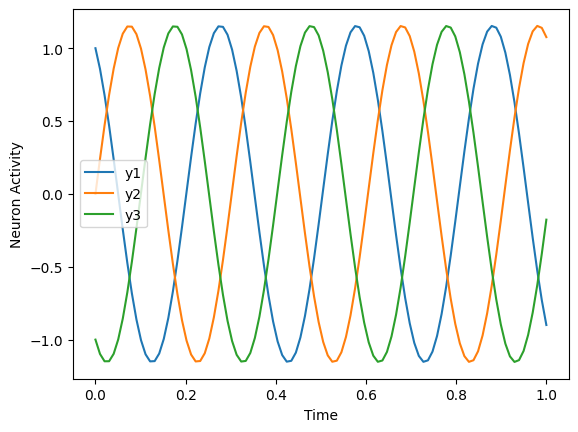

In [44]:

# Define the neuron network matrix
def three_neuron(t, y):
  dydt = np.array([[-5, -17, 7],
                   [7, -5, -17],
                   [-17, 7, -5]]) @ y

  return dydt

# Define the time span and initial conditions
tspan = [0, 1] # [start, end]
initial_conditions = [1, 0, -1]

# Solve the ODE system using solve_ivp
solution = solve_ivp(three_neuron, tspan, initial_conditions, t_eval=np.linspace(0, tspan[1], 100))

# Plot the results
plt.plot(solution.t, solution.y[0], label='y1')
plt.plot(solution.t, solution.y[1], label='y2')
plt.plot(solution.t, solution.y[2], label='y3')

plt.xlabel('Time')
plt.ylabel('Neuron Activity')
plt.legend()
plt.show()


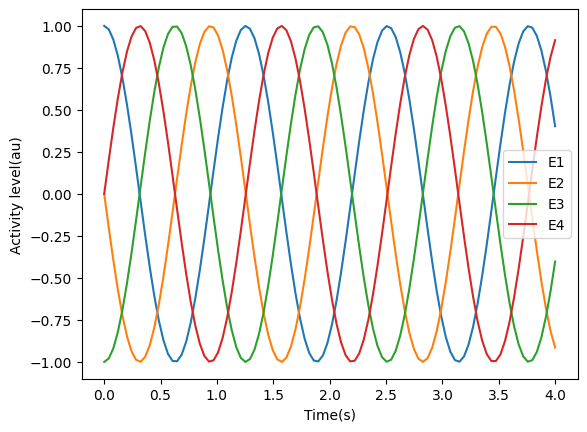

In [55]:
g = 3

def respiration_network(t, y):
  A = np.array([[-3, 0, -g, -5],
                [-5, -3, 0, -g],
                [-g, -5, -3, 0],
                [0, -g, -5, -3]])
  return A@y

# Define the time span and initial conditions
tspan = [0, 4] # [start, end]
initial_conditions = [1, 0, -1, 0]

# Solve the ODE system using solve_ivp
solution = solve_ivp(respiration_network, tspan,
initial_conditions, t_eval=np.linspace(0, 4, 100))

# Plot the results
plt.plot(solution.t, solution.y[0], label='E1')
plt.plot(solution.t, solution.y[1], label='E2')
plt.plot(solution.t, solution.y[2], label='E3')
plt.plot(solution.t, solution.y[3], label='E4')

plt.xlabel('Time(s)')
plt.ylabel('Activity level(au)')
plt.legend()
plt.show()

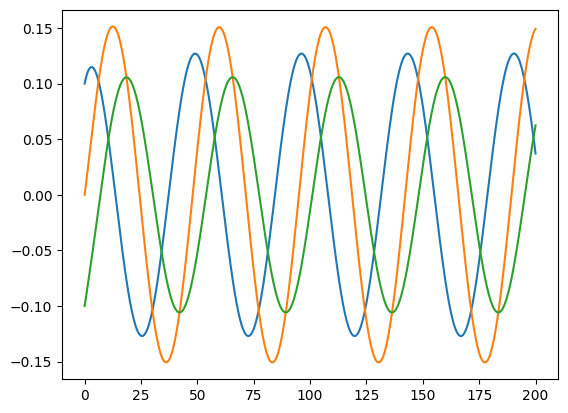

In [52]:
delta = 7.61 # 7.61 ms

def delay_system(y, t):
 dydt = np.array([[-1/10, 0, -1/5], [8/50, -1/50, 0],
 [0, 1/delta, -1/delta]]) @ y
 return dydt
tspan = np.linspace(0, 200, 500)
y0 = [0.1, 0, -0.1]
y = odeint(delay_system, y0, tspan)

# Plot the results
plt.figure(1)
plt.plot(tspan, y)